In [1]:
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import scipy as sp 
import os
from env import host, user, password
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression, RFE


df = acquire.get_data()
df.head(5).T
print(df.shape)

(15035, 15)


In [2]:
df.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr                46
regionidcounty                    0
regionidzip                       9
calculatedfinishedsquarefeet     24
fips                              0
fullbathcnt                      46
lotsizesquarefeet               104
propertylandusedesc               0
transactiondate                   0
taxamount                         0
taxvaluedollarcnt                 0
dtype: int64

In [3]:
df = df.rename(columns={'bathroomcnt':'bathrooms',
                       'bedroomcnt':'bedrooms',
                       'regionidzip':'zip_code',
                       'calculatedfinishedsquarefeet':'squarefootage',
                       'taxvaluedollarcnt':'taxablevalue'})

In [4]:
df.isnull().sum()
df = df.dropna()
df.T

,0,1,2,3,4,6,7,8,9,10,...,15025,15026,15027,15028,15029,15030,15031,15032,15033,15034
id,2061546,1834372,1923117,2121349,2093710,2964522,1175489,950579,570983,1857557,...,1485515,87251,1703615,561932,2965459,1324679,2963359,1948691,444575,1480299
parcelid,11289917,11705026,14269464,11389003,11967869,14236060,14365030,14008322,11552513,12535098,...,12806326,14485874,11202097,13059277,14505389,14339902,13940564,12945108,14214719,11464823
bathrooms,2,1,3,2,1,2,2.5,1,2,2,...,1,2,1,3,2.5,3,3,2,3,3
bedrooms,3,2,4,3,2,3,3,3,3,3,...,3,3,3,4,3,5,5,3,5,4
calculatedbathnbr,2,1,3,2,1,2,2.5,1,2,2,...,1,2,1,3,2.5,3,3,2,3,3
regionidcounty,3101,3101,1286,3101,3101,1286,1286,1286,3101,3101,...,3101,1286,3101,3101,1286,1286,1286,3101,1286,3101
zip_code,97318,96018,96958,96037,96023,97064,96989,97048,96047,96246,...,96174,96996,97328,96505,96995,97018,97067,96523,97065,96129
squarefootage,1458,1421,2541,1650,693,1668,1653,879,1108,1947,...,1119,1453,1014,2091,2050,2526,2735,1536,2655,2305
fips,6037,6037,6059,6037,6037,6059,6059,6059,6037,6037,...,6037,6059,6037,6037,6059,6059,6059,6037,6059,6037
fullbathcnt,2,1,3,2,1,2,2,1,2,2,...,1,2,1,3,2,3,3,2,3,3


In [6]:
df.describe()

,id,parcelid,bathrooms,bedrooms,calculatedbathnbr,regionidcounty,zip_code,squarefootage,fips,fullbathcnt,lotsizesquarefeet,taxamount,taxablevalue
count,1.488500e+04,1.488500e+04,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,1.488500e+04,14885.000000,1.488500e+04
mean,1.516940e+06,1.299936e+07,2.323850,3.315284,2.323850,2513.706416,96653.182197,1937.913806,6049.427007,2.255694,1.053016e+04,6563.754285,5.395825e+05
std,8.595344e+05,3.020847e+06,1.014496,0.927910,1.014496,807.080404,4986.117048,992.419045,21.253310,0.988269,2.938639e+04,8429.559403,7.292172e+05
min,3.490000e+02,1.071210e+07,1.000000,0.000000,1.000000,1286.000000,95982.000000,300.000000,6037.000000,1.000000,5.940000e+02,51.260000,1.050400e+04
25%,7.812650e+05,1.150317e+07,2.000000,3.000000,2.000000,1286.000000,96208.000000,1276.000000,6037.000000,2.000000,5.594000e+03,2709.810000,1.990190e+05
50%,1.537535e+06,1.258607e+07,2.000000,3.000000,2.000000,3101.000000,96414.000000,1678.000000,6037.000000,2.000000,6.868000e+03,4759.420000,3.845010e+05
75%,2.260736e+06,1.414327e+07,3.000000,4.000000,3.000000,3101.000000,96996.000000,2341.000000,6059.000000,3.000000,8.863000e+03,7637.040000,6.433630e+05
max,2.982270e+06,1.629608e+08,11.000000,11.000000,11.000000,3101.000000,399675.000000,15450.000000,6111.000000,11.000000,1.323788e+06,276797.830000,2.385837e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14885 entries, 0 to 15034
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14885 non-null  int64  
 1   parcelid             14885 non-null  int64  
 2   bathrooms            14885 non-null  float64
 3   bedrooms             14885 non-null  float64
 4   calculatedbathnbr    14885 non-null  float64
 5   regionidcounty       14885 non-null  float64
 6   zip_code             14885 non-null  float64
 7   squarefootage        14885 non-null  float64
 8   fips                 14885 non-null  float64
 9   fullbathcnt          14885 non-null  float64
 10  lotsizesquarefeet    14885 non-null  float64
 11  propertylandusedesc  14885 non-null  object 
 12  transactiondate      14885 non-null  object 
 13  taxamount            14885 non-null  float64
 14  taxablevalue         14885 non-null  float64
dtypes: float64(11), int64(2), object(2)


In [8]:
df = df[df.bathrooms > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14885 entries, 0 to 15034
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14885 non-null  int64  
 1   parcelid             14885 non-null  int64  
 2   bathrooms            14885 non-null  float64
 3   bedrooms             14885 non-null  float64
 4   calculatedbathnbr    14885 non-null  float64
 5   regionidcounty       14885 non-null  float64
 6   zip_code             14885 non-null  float64
 7   squarefootage        14885 non-null  float64
 8   fips                 14885 non-null  float64
 9   fullbathcnt          14885 non-null  float64
 10  lotsizesquarefeet    14885 non-null  float64
 11  propertylandusedesc  14885 non-null  object 
 12  transactiondate      14885 non-null  object 
 13  taxamount            14885 non-null  float64
 14  taxablevalue         14885 non-null  float64
dtypes: float64(11), int64(2), object(2)


In [22]:
r, p = stats.pearsonr(df.finishedsquarefeet12,df.taxvaluedollarcnt)
print('p=', p)
print('r=', r)

p= 0.0
r= 0.6036064915233408


In [23]:
t, p = stats.ttest_ind(df.taxvaluedollarcnt,df.finishedsquarefeet12, equal_var=False)

print('t=', t)
print('p=', p)

t= 89.76776514511053
p= 0.0


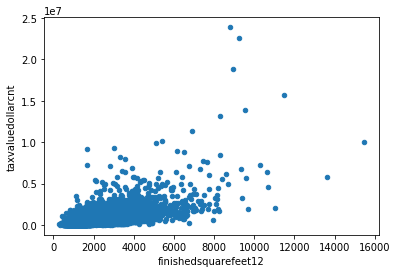

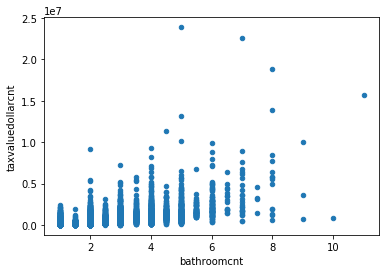

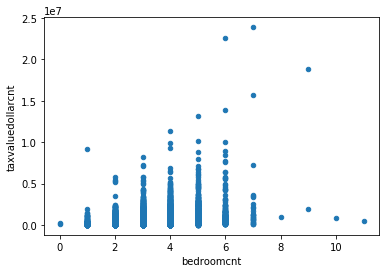

In [24]:
df.plot.scatter(y='taxvaluedollarcnt', x='finishedsquarefeet12')
df.plot.scatter(y='taxvaluedollarcnt', x='bathroomcnt')
df.plot.scatter(y='taxvaluedollarcnt', x='bedroomcnt')

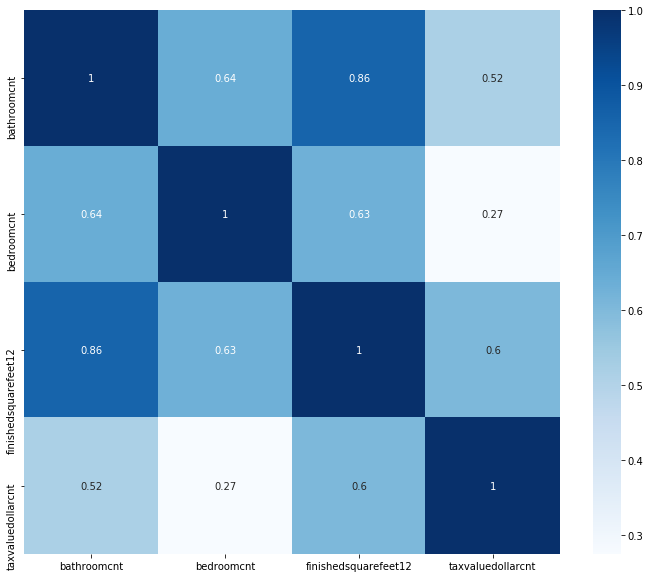

In [38]:

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [25]:
df.drop(columns=['propertylandusedesc','id','parcelid','transactiondate','taxamount',
                'regionidcounty','regionidzip','fips','fullbathcnt','lotsizesquarefeet','calculatedbathnbr'],inplace=True)
df.head()

,bathroomcnt,bedroomcnt,finishedsquarefeet12,taxvaluedollarcnt
0,2.0,3.0,1458.0,136104.0
1,1.0,2.0,1421.0,35606.0
2,3.0,4.0,2541.0,880456.0
3,2.0,3.0,1650.0,614000.0
4,1.0,2.0,693.0,274237.0


In [26]:
train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
print(train.shape, validate.shape, test.shape)

X_train = train.drop(columns=['taxvaluedollarcnt'])
X_validate = validate.drop(columns=['taxvaluedollarcnt'])
X_test = test.drop(columns=['taxvaluedollarcnt'])

y_train = train[['taxvaluedollarcnt']]
y_validate = validate[['taxvaluedollarcnt']]
y_test = test[['taxvaluedollarcnt']]

scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns.values).set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled,columns=X_validate.columns.values).set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns.values).set_index([X_test.index.values])

(8315, 4) (3564, 4) (2970, 4)


In [27]:
print('Average Taxable Value:', y_train.mean())
print('')
print('Median Taxable Value:',  y_train.median())

Average Taxable Value: taxvaluedollarcnt    543964.783524
dtype: float64

Median Taxable Value: taxvaluedollarcnt    380000.0
dtype: float64


In [44]:
from sklearn.metrics import mean_squared_error, explained_variance_score

baseline = np.mean(y_train)
baseline

taxvaluedollarcnt    543964.783524
dtype: float64

In [29]:
X_train_scaled.isnull().sum()

bathroomcnt             0
bedroomcnt              0
finishedsquarefeet12    0
dtype: int64

In [30]:
y_train.isnull().sum()

taxvaluedollarcnt    0
dtype: int64

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

#make it
lm = LinearRegression(normalize=True)

#fit it
lm.fit(X_train_scaled, y_train)

#predict it
lm_pred = lm.predict(X_train_scaled)

#compute it
lm_mse = mean_squared_error(y_train, lm_pred)
lm_rmse = lm_mse**.5
lm_rmse

630847.136289539

In [32]:
#make it
lars = LassoLars(alpha=0.1)

#fit it
lars.fit(X_train_scaled, y_train)

# predict our training observations
lars_pred = lars.predict(X_train_scaled)

# evaluate our training predictions
lars_mse = mean_squared_error(y_train, lars_pred)
lars_rmse = lars_mse**.5
lars_rmse

630847.136696442

In [45]:
#make it
pf = PolynomialFeatures(degree=3)

#fit it
X_train_cubed = pf.fit_transform(X_train_scaled)

lm_cubed = LinearRegression()
lm_cubed.fit(X_train_cubed, y_train)

# predict our training observations (the cubed version)
lm_cubed_pred = lm_cubed.predict(X_train_cubed)

# evaluate our predictions on training observations
lm_cubed_mse = mean_squared_error(y_train, lm_cubed_pred)
lm_cubed_rmse = lm_cubed_mse**.5

print('The baseline is','               ',baseline)
print('The Linear Regression RMSE is',' ',lm_rmse)
print('The LassoLars RMSE is','         ',lars_rmse)
print('The PolynomialFeature RMSE is',' ',lm_cubed_rmse)

The baseline is                 taxvaluedollarcnt    543964.783524
dtype: float64
The Linear Regression RMSE is   630847.136289539
The LassoLars RMSE is           630847.136696442
The PolynomialFeature RMSE is   540265.3997966972


In [35]:
fs = SelectKBest(f_regression, k=1).fit(X_train, y_train)
fs_sup = fs.get_support()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False, False,  True])